<a href="https://colab.research.google.com/github/franz6ko/deep-learning/blob/main/Clase-1/Deep_Learning_Clase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regresión lineal para aproximar la función lógica XOR

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
Y = np.array([0,1,1,0]).T
w = (np.linalg.inv(X.T @ X)) @ X.T @ Y

print(w)

[0.00000000e+00 2.22044605e-16 5.00000000e-01]


### Implementación una red neuronal para aproximar la función lógica XOR


Notas:

- El comportamiento del modelo está muy influido por cómo inicializo las variables. Valores entre 0 y 1 (fx random) no daban buenos resultados al igual que valores distribuidos normalmente con media 0 y desviación estándar 1 (fx randn). Valores entre -10 y 10 con distribución uniforme dan los mejores resultados.

- Con las funciones randn y random, el modelo cae siempre en un mínimo local supongo ya que el error siempre está alrededor de 0.25 (3 casos bien y uno mal del dataset)

- Curiosamente si despues del forward fuerzo el predict a 0 o 1, el modelo con las funciones randn y random sí converge algunas veces.

- Hice un bucle en una segunda parte en la que se corre SGD varias veces y se guarda el mejor resultado.

In [27]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [28]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

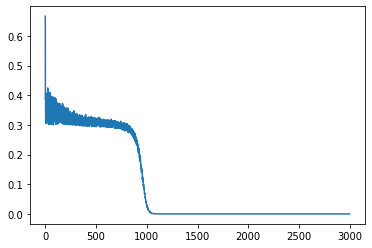

In [33]:
## Stochastic Gradient Descent
def train_sgd(X, Y, n_epochs, alpha):

  n_samples = X.shape[0]

  # Random initialization
  w111 = np.random.uniform(0,1,size=1)
  w112 = np.random.uniform(0,1,size=1)
  b11  = np.random.uniform(0,1,size=1)
  w121 = np.random.uniform(0,1,size=1)
  w122 = np.random.uniform(0,1,size=1)
  b12  = np.random.uniform(0,1,size=1)
  w211 = np.random.uniform(0,1,size=1)
  w212 = np.random.uniform(0,1,size=1)
  b21  = np.random.uniform(0,1,size=1)

  mse = []

  for epoch in range(n_epochs):

    # Shuffle the samples
    idx = np.random.permutation(n_samples)
    X_sh = X[idx]
    Y_sh = Y[idx]

    errors = []

    for i in range(n_samples):

      x = X_sh[i]
      y = Y_sh[i]

      ### Forward
      # First layer
      z11 = w111 * x[0] + w112 * x[1] + b11
      a11 = sigmoid(z11)
      z12 = w121 * x[0] + w122 * x[1] + b12
      a12 = sigmoid(z12)
      # Second layer (sigmoid ommited to simplify)
      z21 = w211 * a11 + w212 * a12 + b21
      # Output
      yp = z21

      ### Log error
      errors.append((y - yp)**2)

      ### Backward
      # First layer
      dL_dw111 = -2 * (y - yp) * w211 * sigmoid(z11) * (1 - sigmoid(z11)) * x[0]
      dL_dw112 = -2 * (y - yp) * w211 * sigmoid(z11) * (1 - sigmoid(z11)) * x[1]
      dL_db11  = -2 * (y - yp) * w211 * sigmoid(z11) * (1 - sigmoid(z11))
      dL_dw121 = -2 * (y - yp) * w212 * sigmoid(z12) * (1 - sigmoid(z12)) * x[0]
      dL_dw122 = -2 * (y - yp) * w212 * sigmoid(z12) * (1 - sigmoid(z12)) * x[1]
      dL_db12  = -2 * (y - yp) * w212 * sigmoid(z12) * (1 - sigmoid(z12))
      # Second layer
      dL_dw211 = -2 * (y - yp) * a11
      dL_dw212 = -2 * (y - yp) * a12
      dL_db21  = -2 * (y - yp) * 1

      ### Parameters update
      # First layer
      w111 = w111 - alpha * dL_dw111
      w112 = w112 - alpha * dL_dw112
      b11  = b11  - alpha * dL_db11
      w121 = w121 - alpha * dL_dw121
      w122 = w122 - alpha * dL_dw122
      b12  = b12  - alpha * dL_db12
      # Second layer
      w211 = w211 - alpha * dL_dw211
      w212 = w212 - alpha * dL_dw212
      b21  = b21  - alpha * dL_db21
    
    error = np.mean(errors)
    mse.append(error)

  params = [w111, w112, b11, w121, w122, b12, w211, w212, b21]
  return params, mse

params, mse = train_sgd(X, Y, n_epochs=3000, alpha = 0.1)
plt.plot(mse)

In [40]:
w111, w112, b11, w121, w122, b12, w211, w212, b21 = params
def predict(x):
    # First layer
    z11 = w111 * x[0] + w112 * x[1] + b11
    a11 = sigmoid(z11)
    z12 = w121 * x[0] + w122 * x[1] + b12
    a12 = sigmoid(z12)
    # Second layer
    z21 = w211 * a11 + w212 * a12 + b21
    # Output
    yp = z21 > 0.5
    return yp

In [41]:
print(predict([0,0]))
print(predict([1,0]))
print(predict([0,1]))
print(predict([1,1]))

[False]
[ True]
[ True]
[False]
